<b>HW1</b> <br>
<b>Name:</b> Varun Pradeep Joshi <br>
<b>Github Username:</b> varunjoshi29 <br>
<b> Usc Id:</b> 1747956384

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

### 1. (a) Download the Vertebral Column Data Set:

In [41]:
df = pd.read_csv('../../data/vertebral_column_data/column_2C.dat',sep=' ', names=['PI','PT', 'LLA', 'SS', 'PR', 'GS', 'LABEL'])
df.loc[df['LABEL'] == 'AB', 'LABEL'] = 1
df.loc[df['LABEL'] == 'NO', 'LABEL'] = 0
df.head()

PI     PT    LLA     SS      PR     GS LABEL
0  63.03  22.55  39.61  40.48   98.67  -0.25     1
1  39.06  10.06  25.02  29.00  114.41   4.56     1
2  68.83  22.22  50.09  46.61  105.99  -3.53     1
3  69.30  24.65  44.31  44.64  101.87  11.21     1
4  49.71   9.65  28.32  40.06  108.17   7.92     1

<b> Summary of Features: </b> <br>
pelvic incidence = PI <br>
pelvic tilt = PT <br>
lumbar lordosis angle = LLA <br>
sacral slope = SS <br>
pelvic radius = PR <br>
grade of spondylolisthesis = GR <br>
Class (Normal:0, Abnormal:1) = LABEL <br>

### 1. (b) Pre-Processing and Exploratory data analysis:

####  (i) Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

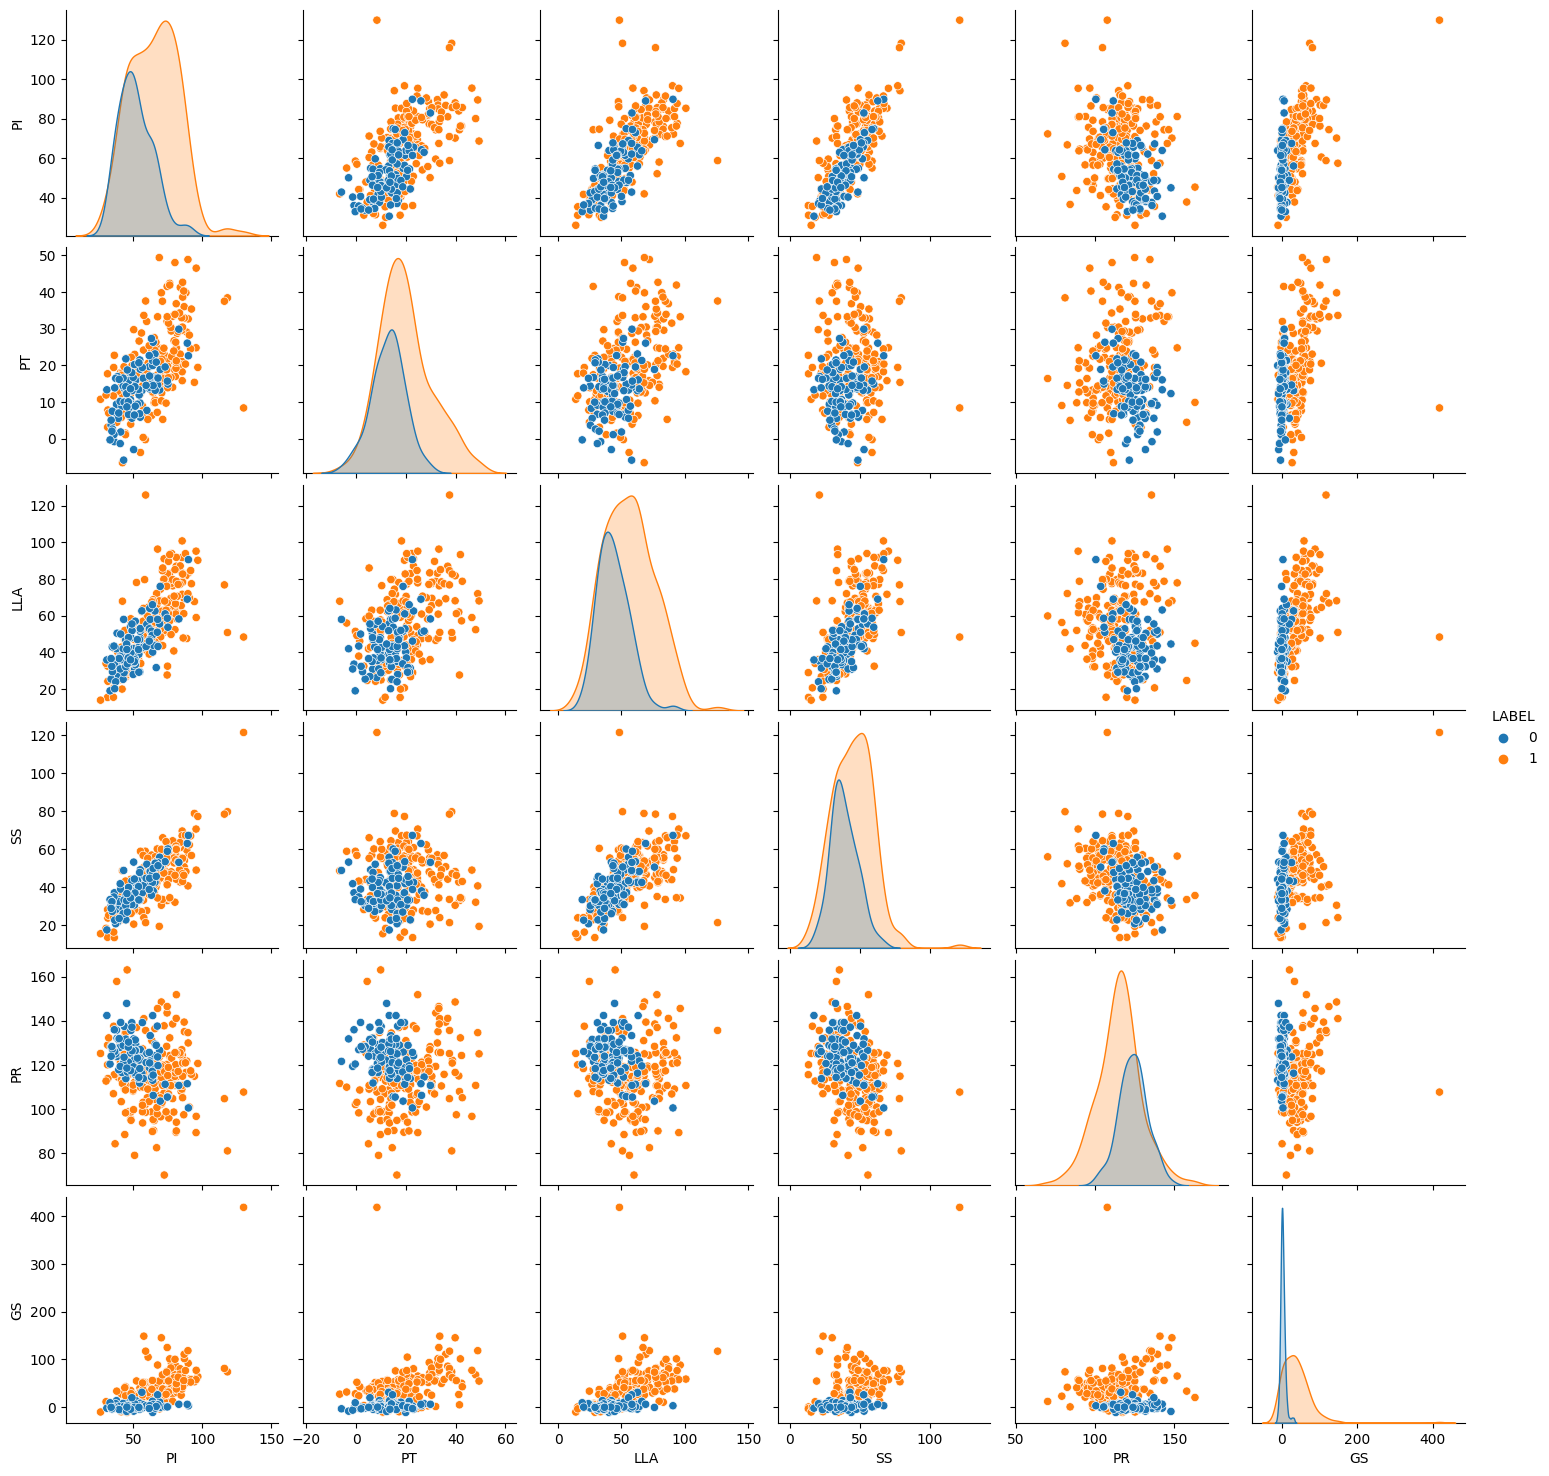

In [42]:
sns.pairplot(df,hue='LABEL')

#### (ii) Make boxplots for each of the independent variables. Use color to show Classes 0 and 1

<AxesSubplot:xlabel='LABEL', ylabel='GS'>

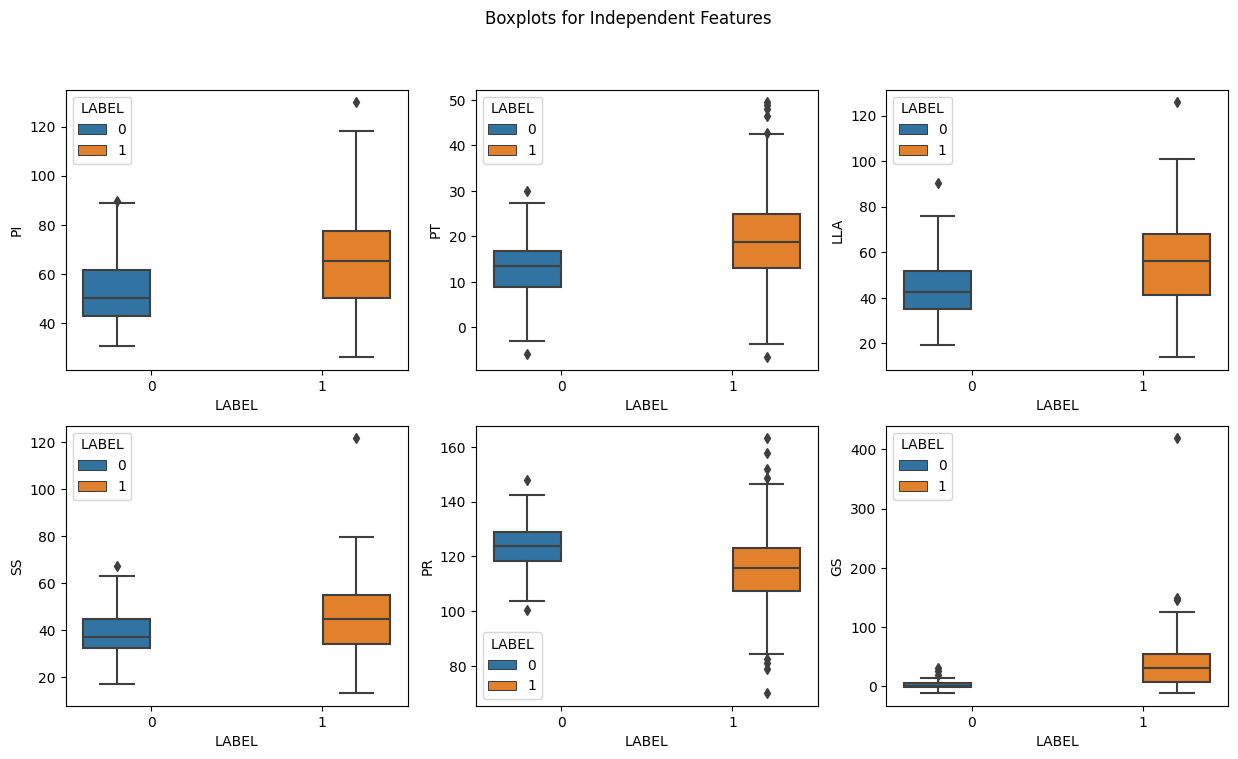

In [43]:
fig, axes = plt.subplots(2, 3, figsize=(15,8))
axes = axes.flatten()
fig.suptitle('Boxplots for Independent Features')
sns.boxplot(data=df, ax=axes[0], orient='v', x = 'LABEL', y ='PI',hue ='LABEL')
sns.boxplot(data=df, ax=axes[1], orient='v', x = 'LABEL', y ='PT',hue ='LABEL')
sns.boxplot(data=df, ax=axes[2], orient='v', x = 'LABEL', y ='LLA',hue ='LABEL')
sns.boxplot(data=df, ax=axes[3], orient='v', x = 'LABEL', y ='SS',hue ='LABEL')
sns.boxplot(data=df, ax=axes[4], orient='v', x = 'LABEL', y ='PR',hue ='LABEL')
sns.boxplot(data=df, ax=axes[5], orient='v', x = 'LABEL', y ='GS',hue ='LABEL')

#### (iii) Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [44]:
df_class_0 = df[df['LABEL'] == 0]
df_class_1 = df[df['LABEL'] == 1]

In [45]:
df_class_0_y = df_class_0['LABEL'].astype('int')
df_class_0_x = df_class_0[df_class_0.columns.drop('LABEL')]
df_class_1_y = df_class_1['LABEL'].astype('int')
df_class_1_x = df_class_1[df_class_1.columns.drop('LABEL')]

In [46]:
df_train = pd.concat([df_class_0[:70], df_class_1[:140]])
df_test = pd.concat([df_class_0[70:], df_class_1[140:]])
df_train_y = df_train['LABEL'].astype('int')
df_train_x = df_train[df_train.columns.drop('LABEL')]
df_test_y = df_test['LABEL'].astype('int')
df_test_x = df_test[df_test.columns.drop('LABEL')]

### 1. (c) Classification using KNN on Vertebral Column Data Set

#### (i) Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [47]:
k = 208

lowest_training_error = float('inf')

best_k = -1
pred_test_best = None
acc_best = -1
ks = []
train_error = []
test_error = []
while k > 0:
    ks.append(k)
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(df_train_x, df_train_y)
    pred_train = model.predict(df_train_x)
    pred_test = model.predict(df_test_x)
    train_acc = metrics.accuracy_score(df_train_y, pred_train)
    lowest_training_error = min(lowest_training_error, 1 - train_acc)
    test_acc = metrics.accuracy_score(df_test_y, pred_test)
    if test_acc > acc_best:
        acc_best = test_acc
        pred_test_best = pred_test[:]
        best_k = k
    train_error.append(1-train_acc)
    test_error.append(1-test_acc)
    k -= 3
    

In [48]:
print(f"Lowest Training error achieved is {lowest_training_error}")

Lowest Training error achieved is 0.0


#### (ii) Test all the data in the test database with k nearest neighbors. Take de- cisions by majority polling. Plot train and test errors in terms of k for k ∈ { 208 , 205 , . . . , 7 , 4 , 1 , } (in reverse order). You are welcome to use smaller increments of k . Which k* is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F 1 -score when k = k*

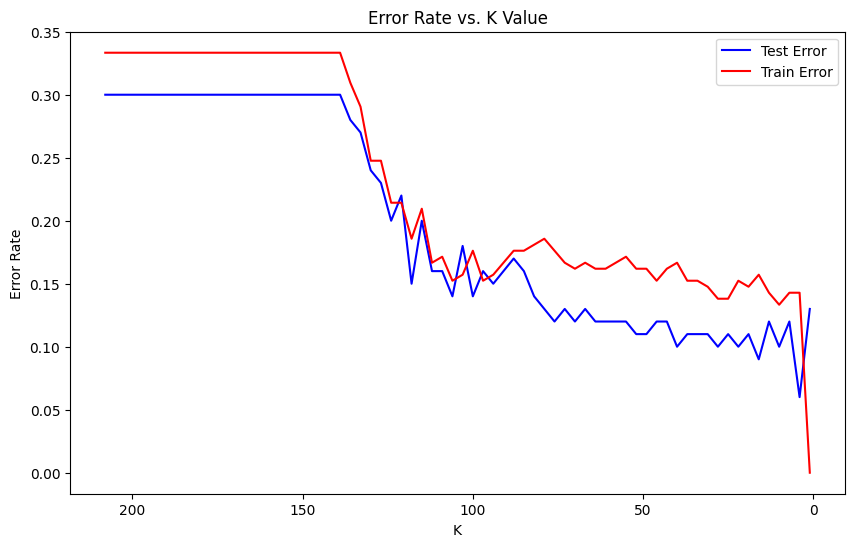

In [49]:
plt.figure(figsize=(10,6))
plt.plot(ks,test_error, color='blue', label='Test Error')
plt.plot(ks,train_error, color='red', label='Train Error')
plt.gca().invert_xaxis()
plt.legend()
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [50]:
print(f"Best Value for k is {best_k}")
print(f"The accuracy for best value of k: {best_k} is {acc_best}")

Best Value for k is 4
The accuracy for best value of k: 4 is 0.94


In [51]:
true_neg, false_pos, false_neg, true_pos = confusion_matrix(df_test_y, pred_test_best).ravel()
print(f"True Negative Rate : {true_neg}")
print(f"False Positive Rate : {false_pos}")
print(f"False Negative Rate : {false_neg}")
print(f"True Positive Rate : {true_pos}")
print("(All above numbers printed considering per 100)")

True Negative Rate : 25
False Positive Rate : 5
False Negative Rate : 1
True Positive Rate : 69
(All above numbers printed considering per 100)


In [52]:
print(classification_report(df_test_y, pred_test_best))


              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100



#### (iii) Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate , 3 which is obtained by some value of k , against the size of training set, when the size of training set is N ∈ { 10 , 20 , 30 , . . . , 210 } . 4 Note: for each N , select your training set by choosing the first b N/ 3 c rows of Class 0 and the first N − b N/ 3 c rows of Class 1 in the training set you created in 1(b)iii. Also, for each N , select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from { 1 , 6 , 11 , . . . , 196 } . This plot is called a Learning Curve

In [53]:
test_err = []
Ns = [ i for i in range(10,211,10)]
for N in Ns:
    class_0_size = N//3
    class_1_size = N - class_0_size
    train_x = pd.concat([df_class_0_x[:class_0_size], df_class_1_x[:class_1_size]])
    train_y = pd.concat([df_class_0_y[:class_0_size], df_class_1_y[:class_1_size]])
    acc_best = -1 
    for k in range(1,N+1, 5):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(train_x, train_y)
        pred = model.predict(df_test_x)
        acc = metrics.accuracy_score(df_test_y, pred)
        if acc > acc_best:
            acc_best = acc
    
    test_err.append(1-acc_best)

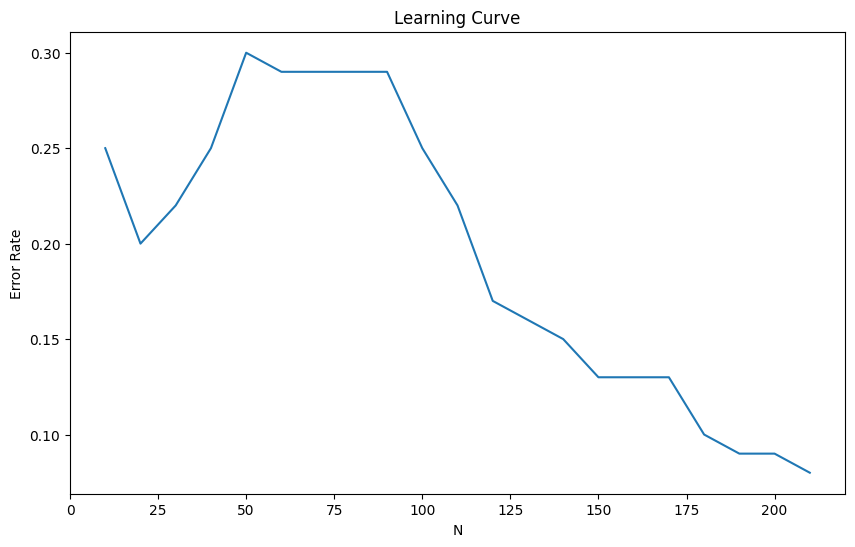

In [54]:
plt.figure(figsize=(10,6))
plt.plot(Ns,test_err)
plt.title('Learning Curve')
plt.xlabel('N')
plt.ylabel('Error Rate')
plt.show()

### 1. (d) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k* ) in a table. Use all of your training data and select the best k when { 1 , 6 , 11 , . . . , 196 }


In [55]:
k_to_test = [i for i in range(1, 197, 5)]
info = {}

#### (i) Minkowski Distance:

(A) which becomes Manhattan Distance with p = 1.

In [56]:
acc_best = -1
err_best = None
k_best = None
for k in k_to_test:
    model = KNeighborsClassifier(n_neighbors=k, p=1)
    model.fit(df_train_x, df_train_y)
    pred_test = model.predict(df_test_x)
    test_acc = metrics.accuracy_score(df_test_y, pred_test)
    if test_acc > acc_best:
        acc_best = test_acc
        err_best = 1 - acc_best
        k_best = k
info["minkowski_p_1"] = err_best

In [57]:
print(f"Best results when p = 1 obtained at k = {k_best}, error was {err_best}")

Best results when p = 1 obtained at k = 6, error was 0.10999999999999999


(B) With log p (base 10) ∈ { 0.1, 0.2, 0.3, ... ,1 }. In this case, use the k* you found for the Manhattan distance in 1(d)iA. What is the best log p (base 10) ?

In [58]:
p_to_test = [ 10**(i/10) for i in range(1, 11, 1)]

In [59]:
acc_best = -1
err_best = None
best_log_p_value = None
for i, p_ in enumerate(p_to_test):
    model = KNeighborsClassifier(n_neighbors=k_best, p=p_)
    model.fit(df_train_x, df_train_y)
    pred_test = model.predict(df_test_x)
    test_acc = metrics.accuracy_score(df_test_y, pred_test)
    if test_acc > acc_best:
        acc_best = test_acc
        err_best = 1 - acc_best
        best_log_p_value = (i+1) / 10
info["minkowski_p_best_log"] = err_best

In [60]:
print(f"Best results when k = {k_best} obtained at log p = {best_log_p_value}, error was {err_best}")

Best results when k = 6 obtained at log p = 0.6, error was 0.06000000000000005


(C) which becomes Chebyshev Distance with p → ∞

In [61]:
acc_best = -1
err_best = None
k_best = None
for k in k_to_test:
    model = KNeighborsClassifier(n_neighbors=k, p=float('inf'))
    model.fit(df_train_x, df_train_y)
    pred_test = model.predict(df_test_x)
    test_acc = metrics.accuracy_score(df_test_y, pred_test)
    if test_acc > acc_best:
        acc_best = test_acc
        err_best = 1 - acc_best
        k_best = k
info["minkowski_p_inf"] = err_best

In [62]:
print(f"Best results when p → ∞ obtained at k = {k_best}, error was {err_best}")

Best results when p → ∞ obtained at k = 16, error was 0.07999999999999996


#### (ii) Mahalanobis Distance:

In [63]:
acc_best = -1
err_best = None
k_best = None
for k in k_to_test:
    model = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI': np.linalg.pinv(np.cov(df_train_x, rowvar=False))})
    model.fit(df_train_x, df_train_y)
    pred_test = model.predict(df_test_x)
    test_acc = metrics.accuracy_score(df_test_y, pred_test)
    if test_acc > acc_best:
        acc_best = test_acc
        err_best = 1 - acc_best
        k_best = k
info["mahalanobis"] = err_best

In [64]:
print(f"Best results with mahalanobis distance obtained at k = {k_best}, error was {err_best}")

Best results with mahalanobis distance obtained at k = 1, error was 0.17000000000000004


In [65]:
table = pd.DataFrame.from_dict(info, orient='index').reset_index()
table.columns = ['Metric', 'Error']
print("Below is the summary of results. Metrics and their test error")
table.head()

Below is the summary of results. Metrics and their test error


Metric  Error
0         minkowski_p_1   0.11
1  minkowski_p_best_log   0.06
2       minkowski_p_inf   0.08
3           mahalanobis   0.17

### 1. (e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1, 6, 11, 16, ..., 196}.

In [66]:
info2 = {}

In [67]:
acc_best = -1
err_best = None
k_best = None
for k in k_to_test:
    model = KNeighborsClassifier(n_neighbors=k, weights='distance')
    model.fit(df_train_x, df_train_y)
    pred_test = model.predict(df_test_x)
    test_acc = metrics.accuracy_score(df_test_y, pred_test)
    if test_acc > acc_best:
        acc_best = test_acc
        err_best = 1 - acc_best
        k_best = k
info2["weighted_euclidean"] = err_best

In [68]:
print(f"Best results with euclidean distance and weighted decision obtained at k = {k_best}, error was {err_best}")

Best results with euclidean distance and weighted decision obtained at k = 6, error was 0.09999999999999998


In [69]:
acc_best = -1
err_best = None
k_best = None
for k in k_to_test:
    model = KNeighborsClassifier(n_neighbors=k, weights='distance', p = 1)
    model.fit(df_train_x, df_train_y)
    pred_test = model.predict(df_test_x)
    test_acc = metrics.accuracy_score(df_test_y, pred_test)
    if test_acc > acc_best:
        acc_best = test_acc
        err_best = 1 - acc_best
        k_best = k
info2["weighted_manhattan"] = err_best

In [70]:
print(f"Best results with manhattan distance and weighted decision obtained at k = {k_best}, error was {err_best}")

Best results with manhattan distance and weighted decision obtained at k = 26, error was 0.09999999999999998


In [71]:
acc_best = -1
err_best = None
k_best = None
for k in k_to_test:
    model = KNeighborsClassifier(n_neighbors=k, weights='distance', p = float('inf'))
    model.fit(df_train_x, df_train_y)
    pred_test = model.predict(df_test_x)
    test_acc = metrics.accuracy_score(df_test_y, pred_test)
    if test_acc > acc_best:
        acc_best = test_acc
        err_best = 1 - acc_best
        k_best = k
info2["weighted_chebyshev"] = err_best

In [72]:
print(f"Best results with chebyshev distance and weighted decision obtained at k = {k_best}, error was {err_best}")

Best results with chebyshev distance and weighted decision obtained at k = 16, error was 0.10999999999999999


In [73]:
table2 = pd.DataFrame.from_dict(info2, orient='index').reset_index()
table2.columns = ['Metric', 'Error']
print("Below is the summary of results. Required Metrics with weighted decision and their test error")
table2.head()

Below is the summary of results. Required Metrics with weighted decision and their test error


Metric  Error
0  weighted_euclidean   0.10
1  weighted_manhattan   0.10
2  weighted_chebyshev   0.11

### 1. (f) What is the lowest training error rate you achieved in this homework?

As calculated and observed, in 1. (c), lowest training error achieved in this homework is <b>0.0</b>. This is obvious as when k is equal to 1, and test sample is in the training dataset (since test data set is training data set itself while calculating training error), it'll choose itself as the closest and never make mistake. 